<a href="https://colab.research.google.com/github/pikey-msc/DeepLearn/blob/master/Notebooks/Regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regularización
Imaginemos por un momento que tenemos que resolver un problema de datos usando un algoritmo de Machine Learning clásico. Una estrategia muy socorrida sería acotar primero el número de variables de entrada, con el fin de reducir la dimensionalidad del problema, y de esa forma mejorar el rendimiento y el tiempo de entrenamiento del modelo.

En la actualidad cuando usamos Deep Learning la laboriosa tarea de optimizar nuestros procesos ha quedado un poco en segundo plano, gracias sobre todo a la llegada de las GPU y el fácil acceso a ellas. Como contamos con más recursos ya no estamos dispuestos a seguir sacrificando ningún detalle de los datos de entrada, así que introducimos a la red absolutamente todas las variables, por muchas que sean. Además nos empeñamos en minimizar el error hasta el extremo, lo que se traduce en un aumento sin control del número de capas y parámetros de nuestra red, animados siempre por el Teorema de Aproximación Universal.

Este engordamiento hace que la complejidad de la red sea mayor, pero también que el riesgo de sobreajuste se dispare, sobre todo cuando tenemos pocas muestras de entrenamiento (el número de muestras de entrada sería mucho menor que el número de parámetros usados por la red para ajustarse a esos escasos datos). Para acabar con este problema es precisamente para lo que se utilizan las conocidas como técnicas de regularización.

A continuación haremos un breve repaso de las más usadas a día de hoy, debido en gran parte a su buen funcionamiento.

## Regularización L2

La idea detrás de este tipo de regularización es reducir el valor de los parámetros para que sean pequeños.
Esta técnica introduce un término adicional de penalización en la función de coste original ($L$), añadiendo a su valor la suma de los cuadrados de los parámetros ($\omega$).
La mala noticia es que este nuevo término puede ser alto; tanto que la red minimizaría la función de coste haciendo los parámetros muy cercanos a 0, lo que no sería nada conveniente. Es por ello que multiplicaremos ese sumando por una constante ($\lambda$) pequeña, cuyo valor escogeremos de forma arbitraria (0.1, 0.01, $\ldots$).
La función de coste queda por tanto así:
$$L_2(X,\omega)=L(X,\omega)+\lambda\sum_i\omega_i^2$$

Esta es la regularización que se aplica en la regresión conocida como ***Ridge***.

### Regresión Ridge
El propósito es mantener el menor número de perdictores descartando el resto. Con ello se gana interpretabilidad y mejora el error de generalización

Asumamos una muestra aleatoria $x$ de tamaño $m$:

$$
\mathbf{X} = \begin{bmatrix} x_1^\top, \\ x_2^\top, \\ \vdots \\ x_m^\top \end{bmatrix}$$ 

con $x_i \in \mathbb{R}^n $

Donde denotamos $x_i$
​	
  la $i$-ésima observación. Luego $X$ denota la variable de entrada genérica, $X_j$  su $j$-ésimo componente; como $x_{ij}$  el $j$-ésimo componente de la $i$-ésima observación.

En estas notas usemos la regresión lineal como ilustración:

$$y_i = b + x_i ^\top \theta + \eta_i$$

donde $\theta \in \mathbb{R}^{n}$, $b \in \mathbb{R}^1$  el interceptor.

Luego la regresion Ridge esta dada por:
$$b^{ridge},\theta^{ridge} = \underset{b,\theta}{\arg\min} \, \| y - b - \mathbf{X} \theta_{1\ldots n} \|^2 + \lambda \| \theta \|_2^2$$
con el parámetro de complejidad \lambda \ge 0λ≥0 que controla el grado de encogimiento.

**Forma centrada de Ridge**

Note que la penalización no se hace sobre el interceptor bb.

De hecho es fácil notar que si se usan datos centrados:
$$x_{ij} = x_{ij}-\bar x_j$$


Entonces en toma una forma mas simple, el iterceptor estará dado por

$$b^{ridge} \equiv \bar y = \frac{1}{m} \sum_i y_j$$


luego hacemos:
$$y_{i}= y_{i}-\bar y$$

Lo que nos lleva a la forma centrada Ridge:

(*)
$$\theta^{ridge} = \underset{\theta}{\arg\min} \, \| y - \mathbf{X}\theta \|^2 + \lambda \| \theta \|^2$$

Consideremos la versión simplificada (centrada) en (*), luego resolviendo para el gradiente:

$$\theta^{ridge} = (\mathbf{X^\top X + \lambda\,I})^{-1} \mathbf{X^\top} \mathbf{Y}$$

Es decir, le esta sumando $\lambda$ a la diagonal de la matriz Hessiana $\mathbf{X^\top X} $, lo que ayuda a mejorar su condición.

**Forma de Mínimos cuadrados de Ridge**

Proposición.
La Regularización Lineal Ridge (*) es equivalente al problema de mínimos cuadrados:

$$\theta^{ridge} = \underset{\theta}{\arg\min} \, \| b - \mathbf{A}_\lambda \theta \|_2^2$$
 

Donde

$$\mathbf{A}_\lambda \overset {def}{=} \begin{bmatrix} \mathbf{X} \\ \sqrt{\lambda} \mathbf{I} \end{bmatrix}$$,


$$b \overset {def}{=} \begin{bmatrix} y \\ 0 \end{bmatrix}$$


**Forma restringida de Ridge**

El potencial $b^{ridge}$ y $\theta^{ridge}$ puede ser escrito en forma equivalente como un problema con restricciones:

$$b^{ridge}, \theta^{ridge} = \underset{b,\theta}{\arg\min} \, \| y - b - \mathbf{X} \theta \|^2 \;\;\;\;\; \text{sujeto a } \;\;\; \| \theta \|^2 \le t$$

para algun valor de $t$ en correspondencia a $\lambda$. El programa explícitamente impone una restricción en el tamaño de los parámetros.

Dado que se penaliza el cuadrado del la magnitud, el inconveniente principal de la regresión Ridge es que se promoverá que aparezcan varios valores pequeños en vez de uno grande (no promueve ralez).

In [ ]:
import numpy as np 
import sklearn as skl
import matplotlib.pyplot as plt
from PIL import Image
# Modelo Cuadrático: y = x'Ax+ x'b = x'(Ax+b)

# matriz de rotacion (eigen vectores)
alpha=np.pi/12
R = np.matrix([[np.cos(alpha),np.sin(alpha)],[-np.sin(alpha),np.cos(alpha)]]) 
# eigenvalores
D = np.matrix([[1,0],[0,0.2]]) 
# Hessiano
A = 3*np.dot(R,np.dot(D,R.T))
# translacion
b = np.matrix([[-1],[-2]])

#Region a "plotear"
delta = 0.05
x1 = np.arange(-0.5, 2.0, delta)
x2 = np.arange(-0.5, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)

# calculo del modelo cuadratico
rows, cols = X1.shape
Y = np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        x = np.matrix([X1[i,j],X2[i,j]]).T
        Y[i,j]=  np.dot(x.T, np.dot(A,x) + b)

# Regularización $L_1$
Existe otra técnica muy parecida a la anterior denominada regularización $L_1$ donde los parámetros en el sumatorio del término de penalización no se elevan al cuadrado, sino que se usa su valor absoluto.
$$L_1(X,\omega)=L(X,\omega)+\lambda\sum_i |\omega_i|$$
$$\omega_i \leftarrow \omega_i - \eta \cdot \Big[\frac{\partial L (X,\omega)}{\partial \omega_i} + \lambda \cdot sgn(\omega_i)]$$

Esta variante empuja el valor de los parámetros hacia valores más pequeños, haciendo incluso que la influencia de algunas variables de entrada sea nula en la salida de la red, lo que supone una **selección de variables automática**. El resultado es una una mejor generalización, pero sólo hasta cierto punto (la elección del valor de **$\lambda$** cobra más importancia en este caso).
Es la regularización que aplica la regresión **Lasso**.

Para la norma $L_p$*

$$L_p(x) \overset{def}{=} \left[ \sum_i |x_i|^p \right]^{\frac{1}{p}}$$

y toma valores interesantes para $0\lt p\le 10$

Por ejemplo, para el caso ilustrado en dos dimensiones:

$$L_{p}([x,y]^T) = \left[ x^p + y^p \right]^{\frac{1}{p}} =1$$

luego

$$y = \left[1-x^{p}\right]^{\frac{1}{p}}$$
​	

In [ ]:
plt.figure(figsize=(8,8))

# El potencial Quadrático
levels = np.arange(-2.0, 9, 0.2)
CS = plt.contour(X1, X2, Y, levels,
                 linewidths=1,
                 extent=(-3, 3, -2, 2))

#CS = plt.contour(X1, X2, Y)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Regularizacion Ridge vs LASSO vs $L_p$ ')
#-------------------------------------
#Penalizacion L_2
x = np.arange(0,1,0.01)
y = np.sqrt(1-np.power(x,2))
plt.axvline(0.0,ls='dotted', color='k')
plt.axhline(0.0,ls='dotted', color='k')
plt.plot(x,y,'k')
#-------------------------------------
#Penalizacion L_1
x = np.arange(0,1,0.01)
y = 1-x
plt.axvline(0.0,ls='dotted', color='k')
plt.axhline(0.0,ls='dotted', color='k')
plt.plot(x,y,'b')
#-------------------------------------
#Penalizacion L_p, con p=0.4
x = np.arange(0,1,0.01)
p = .8
y = np.power(1-np.power(x,p),1/p)
plt.axvline(0.0,ls='dotted', color='k')
plt.axhline(0.0,ls='dotted', color='k')
plt.plot(x,y,'--')
#-------------------------------------

plt.show()

## Regresión LASSO
La regresion LASSO esta dada por:

$$b^{lasso}, \theta^{lasso} = \underset{b,\theta}{\arg\min}\, U_{l}(b,\theta) = \frac{1}{2}\| y - b - \mathbf{X} \theta \|^2 + \lambda \| \theta \|_1$$
con el parámetro de complejidad \lambda \ge 0λ≥0 que controla el grado de encogimiento.

Propondremos resolver este problema iterando dos pasos (a la vez el segundo paso será revisado con detalle)

Dados unos prametros $\theta$ iniciales, iterar:

1. Calcular el interceptor $b^{k+1}$  resolviendo $\partial U(b,\theta) /\partial b =0$
$$b^{k+1} = \frac{1}{m}\mathbf{1}^\top (\mathbf{X}\theta^{k} -y)$$

2. Actualizar
$$y \leftarrow y- b^{k+1}$$
 
3. Resolver
$$\theta^{k+1} = \underset{b,\theta}{\arg\min}\, U_{l}(b,\theta) = \frac{1}{2}\| y - \mathbf{X} \theta \|^2 + \lambda \| \theta \|_1$$
 
Los pasos son iterados hasta convergencia. El punto es ¿como se resuelve el paso 3?

**Forma Restingida de la Regresión LASSO**

Similarmente a la regresión Ridge, se puede demostrar que la última ecuación tienen una forma equivalente con restricciones:

$$\;\;\;\;\;\;\;\; \theta^{lasso} = \underset{\theta \in \mathbb{R}^n}{\arg\min} \, \| y - \mathbf{X} \theta \|^2 + \lambda t \\ \text{sujeto a } \;\;\; t - \theta \ge 0 \\ \;\;\;\;\;\;\;\;\;\;\;\; t + \theta \ge 0 \\ \;\;\;\;\;\;\;\;\;\;\;\;\;\; t \ge 0$$
para algún valor de $t$ en correspondencia a $\lambda$. El programa explícitamente impone una restricción en el tamaño de los parámetros.

Para resolver este algoritmo se utiliza el algoritmo **Shooting**  y **LARS** (Least Angle Regressions) y también está el **Método de los Multiplicadores con Direcciones Alternadas para LASSO**.


### Método de los Multiplicadores con Direcciones Alternadas para LASSO

El problema LASSO se puede reescribir como

$$\min_{x,z} \; \frac{1}{2}\| Ax - b\|^2_2 + \lambda \| z\|_1 \\ \;\;\; \text{s.a.} \;\;\; x-z=0$$

Luego el Lagrangiano Aumentado se puede escribir como

$$\mathcal{L}_A (x,z,u) = \frac{1}{2}\| Ax - b\|^2_2 + \lambda \| z\|_1 + \frac{\rho}{2} \| x-z-u\|_2^2$$


Y su solución se obtiene altenando:

Resolver para $x \nabla_x \mathcal{L}_A =0$, esto es, resolver
$$(A^\top A+ \rho I ) x = A^\top b + \rho z - u$$

Resolver para $z \nabla_z \mathcal{L}_A =0$, esto es
$$z = S_{\frac{\lambda}{\rho}}(x + u/\rho)$$

Actualizar uu con asceso de gradiente:
$$u = u + \rho \, (x-z)$$

Donde $$S_\theta(x)$$ es la función soft-threshold definida como

$$S_\theta(x) = \left\{\begin{matrix} x-\theta &; x \gt\theta \\ 0 &; -\theta \le x \le \theta \\ x+\theta &; x\lt \theta \end{matrix} \right.$$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#-------------------------------------
# Soft Treshold function
def softTreshold (x, theshold=1):
    s = np.zeros(x.shape)
    idx = x < -theshold
    s[idx] = x[idx]+theshold
    idx = x >  theshold
    s[idx] = x[idx]-theshold
    return s
#-------------------------------------

x = np.arange(-3.0, 3.0, 0.1)
plt.figure(figsize=(4,4))
plt.axvline(0.0, ls='dashed', color='k')
plt.axhline(0.0, ls='dashed', color='k')
plt.plot(x,softTreshold(x, theshold=1))
plt.show()

#### Ejemplo de regresión Lasso


In [ ]:
import numpy as np
import scipy.linalg as spla

m=1000
n=2
theta = np.random.rand(3)
print(theta)

# Matriz de diseño real
x = np.random.rand(m,n)
X = np.concatenate((np.ones((m,1)),x), axis=1)
n = 0.1*np.random.randn(m)

# variable dependiente
y = X@theta + n

# Matriz de diseño extendida
Xn =  np.concatenate((X, x**2), axis=1) 

Solución mediante AMDD

1. $x = (A^\top A+ \rho I )^{-1} A^\top b + \rho z - u$

2. $z = S_{\frac{\lambda}{\rho}}(x + u/\rho)z=S $

3. $u = u + \rho \, (x-z)$

In [ ]:
#-------------------------------------
def ls_AMDD_LASSO(X, y, Lambda=.1, rho=.1, niter = 10, epsilon = 1e-2):
    (m,n) = X.shape
    theta = np.zeros(n)
    u = np.zeros(n)
    z = np.zeros(n)
    M = spla.inv(X.T@X + rho*np.eye(n)) @ X.T
    for t in range(niter):
        theta =  M@y + rho*z - u
        z = softTreshold (theta+u/rho, theshold=Lambda/rho)
        delta=theta-z
        if spla.norm(delta) < epsilon:
            break
        u += rho*delta
        
    return (theta, z, u, delta, t)
#-------------------------------------

thetaLasso, z, u, delta, t = ls_AMDD_LASSO(Xn, y, Lambda=.05, rho=.1, niter=1000, epsilon =1e-5)
print(z,t)
print(thetaLasso)

**Red Elástica**

La regresión usando la penalización Red Elástica esta dada por:

$$b^{en}, \theta^{en} = \underset{b,\theta}{\arg\min}\, E_{e}(b,\theta) = \frac{1}{2}\| y - b - \mathbf{X} \theta \|^2 + \lambda_1 \| \theta \|_1 + \lambda_2 \| \theta\|_2^2$$
con el parámetro $\lambda_1 \gt 0$ que promueve ralez y el parámetro $\lambda_2 \gt 0$ que controla el grado de encogimiento.

Es posible introducir, el Término de Ridge en el términos de datos (prímer potencial) mediante la transformación vista de Ridge a mínimos cuadrados y usar el solucionador de LASSO.

# Normalización por lotes (Batch normalization)

La historia de esta técnica es curiosa. Se presentó como una solución para reducir algo llamado *Internal Covariate Shift*, pero parece que no es eso lo que hace. Aún así es una técnica esencial para redes neuronales por todo lo que aporta, como se explica a continuación.

La normalización en lotes consiste básicamente en añadir un paso extra, habitualmente entre las neuronas y la función de activación, con la idea de normalizar las activaciones de salida. Lo ideal es que la normalización se hiciera usando la media y la varianza de todo el conjunto de entrenamiento, pero si estamos aplicando el descenso del gradiente estocástico para entrenar la red, se usará la media y la varianza de cada mini-lote de entrada.

**Nota**: cada salida de cada neurona se normalizará de forma independiente, lo que quiere decir que en cada iteración se calculará la media y la varianza de cada salida para el mini-lote en curso.

A continuación de la normalización se añaden 2 parámetros: un bias como sumando, y otra constante similar a un bias pero que aparece multiplicando cada activación. Esto se hace para que el rango de la entrada escale fácilmente hasta el rango de salida, lo que ayudará mucho a nuestra red a la hora de ajustar a los datos de entrada, y reducirá las oscilaciones de la función de coste. Como consecuencia de esto podremos aumentar la tasa de aprendizaje (no hay tanto riesgo de acabar en un mínimo local) y la convergencia hacia el mínimo global se producirá más rápidamente.

#Dropout

Esta técnica difiere de las vistas hasta el momento. El procedimiento es sencillo: por cada nueva entrada a la red en fase de entrenamiento, se desactivará aleatoriamente un porcentaje de las neuronas en cada capa oculta, acorde a una probabilidad de descarte previamente definida. Dicha probabilidad puede ser igual para toda la red, o distinta en cada capa.

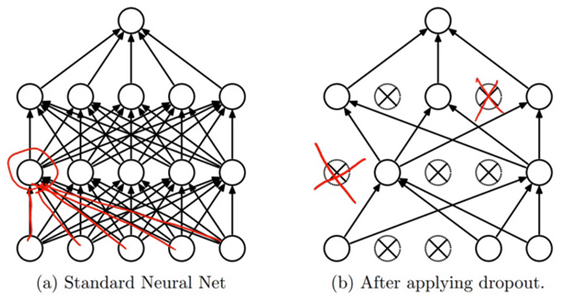

Lo que se consigue con esto es que ninguna neurona memorice parte de la entrada; que es precisamente lo que sucede cuando tenemos sobreajuste.


Una vez tengamos el modelo listo para realizar predicciones sobre muestras nuevas, debemos **compensar** de alguna manera el hecho de que no todas las neuronas permanecieran activas en entrenamiento, ya que en inferencia sí que estarán todas funcionando y por tanto habrá más activaciones contribuyendo a la salida de la red. Un ejemplo de dicha compensación podría ser multiplicar todos los parámetros por la probabilidad de no descarte.

### Regularización en Keras

**Regularizadores de pesos en capas**

Estos permite aplicar penalizaciones sobre los parámetros de las capas o actividad de estas durante la optimización. Estas penalizaciones están sumadas en la función de pérdida que la red optimiza.

Las penalizaciones de las regularizaciones están aplicadas por capa. La aplicación (API) dependerá sobre a qué capa, para varias capas (por ejemplo, Dense, Conv1D, Conv1D, Conv2D, y Conv3D) tienen un API unificado.
Regularization penalties are applied on a per-layer basis. The exact API will depend on the layer, but many layers (e.g. Dense, Conv1D, Conv2D and Conv3D) have a unified API.

Estas capas tienen 3 tipos de argumentos en los que aplican:
* **kernel_regularizer**: Se aplica regularización para penalizar sobre el kernel de la capa.
* **bias_regularizer**: Se aplica regularización para penalizar sobre el kernel de la sesgo o *bias*.
* **activity_regularizer**: Se aplica regularización para penalizar sobre la capa de salida. 

### Ejemplo Sintético


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sys 

def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles


gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
#print("VT",X[0,:],"tel",X[1,:])
print("HS",Y[0,:])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

print(X[:,1:5])



In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
hidden_layer_size=8
output_size = 1
#We build the model, necessary when using tensorflow

model = tf.keras.Sequential([

    tf.keras.layers.Dense(hidden_layer_size, activation='tanh',  kernel_regularizer=tf.keras.regularizers.l2(0.01) , activity_regularizer='l1',bias_regularizer='l1'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation='sigmoid', kernel_regularizer='l1', activity_regularizer='l1',bias_regularizer='l1') 
    #calculates the dot productof the inputsand he weights and add bias
])


model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

print((X.T).shape, Y[0,:].shape)

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)
print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
hidden_layer_size=8
output_size = 1
#We build the model, necessary when using tensorflow

model = tf.keras.Sequential([


    tf.keras.layers.Dense(hidden_layer_size, activation='tanh',  kernel_regularizer=tf.keras.regularizers.l2(0.01) , activity_regularizer='l2',bias_regularizer='l2'),

    #Output layer
    tf.keras.layers.Dense(output_size, activation='sigmoid', kernel_regularizer='l2', activity_regularizer='l2',bias_regularizer='l2') 
    #calculates the dot productof the inputsand he weights and add bias
])


model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

print((X.T).shape, Y[0,:].shape)

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)
print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()